In [1]:
from sklearn import feature_extraction
from bs4 import BeautifulSoup
import re
import nltk
import numpy as np
import pandas as pd

In [2]:
Data = pd.read_csv("~\Desktop\consumer_complaints.csv",encoding='utf-8')

C:\Users\OLUBISI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#select required columns & rows
Data = Data[['consumer_complaint_narrative']]
Data = Data[pd.notnull(Data['consumer_complaint_narrative'])]

In [4]:
Data.head(5)

,consumer_complaint_narrative
190126,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Due to inconsistencies in the amount owed that...
190155,In XX/XX/XXXX my wages that I earned at my job...
190207,I have an open and current mortgage with Chase...
190208,XXXX was submitted XX/XX/XXXX. At the time I s...


In [7]:
# Take some sample of the data
Data_sample = Data.sample(200)

In [8]:
# Remove unwanted symbol
def remove_unwanted_characters(text):
    text = re.sub('\[[^]]*\]', " ", text)
    text = re.sub('XXXX'," ", text)
    text = re.sub('XX/XX/'," ", text)
    return text

Data_sample['consumer_complaint_narrative'] = Data_sample['consumer_complaint_narrative'].apply(remove_unwanted_characters)
Data_sample['consumer_complaint_narrative'] 

323578    In the courts of law, I would like to ask Chas...
536907     2016 I was researching for a good option to p...
191751    I have submitted   disputes to Trans Union cre...
251654    In   , I sent a check for {$99.00} to Citibank...
254570    Last Friday I scheduled a transfer from my    ...
                                ...                        
295903    I took out a loan for   semesters for student ...
286558    I has an account with First Merit Bank. In   2...
250995    My   Prepaid Visa Card by     was loaded with ...
254107    I have a huge complant against this company .....
522867    i overdrafted my account seberl times now chas...
Name: consumer_complaint_narrative, Length: 200, dtype: object

In [9]:
Data_sample.head(5)

,consumer_complaint_narrative
323578,"In the courts of law, I would like to ask Chas..."
536907,2016 I was researching for a good option to p...
191751,I have submitted disputes to Trans Union cre...
251654,"In , I sent a check for {$99.00} to Citibank..."
254570,Last Friday I scheduled a transfer from my ...


In [10]:
#change to lowercase
def remove_capitalization(text):
    lower_text= text.lower()
    return lower_text

Data_sample['consumer_complaint_narrative'] = Data_sample['consumer_complaint_narrative'].apply(remove_capitalization)
Data_sample['consumer_complaint_narrative']

323578    in the courts of law, i would like to ask chas...
536907     2016 i was researching for a good option to p...
191751    i have submitted   disputes to trans union cre...
251654    in   , i sent a check for {$99.00} to citibank...
254570    last friday i scheduled a transfer from my    ...
                                ...                        
295903    i took out a loan for   semesters for student ...
286558    i has an account with first merit bank. in   2...
250995    my   prepaid visa card by     was loaded with ...
254107    i have a huge complant against this company .....
522867    i overdrafted my account seberl times now chas...
Name: consumer_complaint_narrative, Length: 200, dtype: object

In [11]:
def remove_white_space(text):
    return re.sub(r"\s\s+([^ \t\r\n])[ \t]+$", " ", text )
    #return re.sub(r"\s\s+",'  ', text)

Data_sample['consumer_complaint_narrative'] = Data_sample['consumer_complaint_narrative'].apply(remove_white_space)
Data_sample['consumer_complaint_narrative']

323578    in the courts of law, i would like to ask chas...
536907     2016 i was researching for a good option to p...
191751    i have submitted   disputes to trans union cre...
251654    in   , i sent a check for {$99.00} to citibank...
254570    last friday i scheduled a transfer from my    ...
                                ...                        
295903    i took out a loan for   semesters for student ...
286558    i has an account with first merit bank. in   2...
250995    my   prepaid visa card by     was loaded with ...
254107    i have a huge complant against this company .....
522867    i overdrafted my account seberl times now chas...
Name: consumer_complaint_narrative, Length: 200, dtype: object

In [12]:
Data_sample = Data_sample.dropna().reset_index(drop=True)
Data_sample.info()
Data_sample['consumer_complaint_narrative']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   consumer_complaint_narrative  200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


0      in the courts of law, i would like to ask chas...
1       2016 i was researching for a good option to p...
2      i have submitted   disputes to trans union cre...
3      in   , i sent a check for {$99.00} to citibank...
4      last friday i scheduled a transfer from my    ...
                             ...                        
195    i took out a loan for   semesters for student ...
196    i has an account with first merit bank. in   2...
197    my   prepaid visa card by     was loaded with ...
198    i have a huge complant against this company .....
199    i overdrafted my account seberl times now chas...
Name: consumer_complaint_narrative, Length: 200, dtype: object

In [13]:
import re 

def remove_numbers_punctuation(text):
    return re.sub('[^a-zA-Z,,.!:;]' , ' ', text)

def remove_brackets(text):
    return re.sub('\[[^]]*\]', " ", text)

def remove_num_brac_punct(text):
    text = remove_numbers_punctuation(text)
    text = remove_brackets(text)
    return text

Data_sample['consumer_complaint_narrative'] = Data_sample['consumer_complaint_narrative'].apply(remove_num_brac_punct)
Data_sample['consumer_complaint_narrative']

0      in the courts of law, i would like to ask chas...
1            i was researching for a good option to p...
2      i have submitted   disputes to trans union cre...
3      in   , i sent a check for     .    to citibank...
4      last friday i scheduled a transfer from my    ...
                             ...                        
195    i took out a loan for   semesters for student ...
196    i has an account with first merit bank. in    ...
197    my   prepaid visa card by     was loaded with ...
198    i have a huge complant against this company .....
199    i overdrafted my account seberl times now chas...
Name: consumer_complaint_narrative, Length: 200, dtype: object

In [14]:
def tokenize_text(text):
    words = nltk.word_tokenize(text)
    return words

Data_sample['consumer_complaint_narrative'] = Data_sample['consumer_complaint_narrative'].apply(tokenize_text)
Data_sample['consumer_complaint_narrative']

0      [in, the, courts, of, law, ,, i, would, like, ...
1      [i, was, researching, for, a, good, option, to...
2      [i, have, submitted, disputes, to, trans, unio...
3      [in, ,, i, sent, a, check, for, ., to, citiban...
4      [last, friday, i, scheduled, a, transfer, from...
                             ...                        
195    [i, took, out, a, loan, for, semesters, for, s...
196    [i, has, an, account, with, first, merit, bank...
197    [my, prepaid, visa, card, by, was, loaded, wit...
198    [i, have, a, huge, complant, against, this, co...
199    [i, overdrafted, my, account, seberl, times, n...
Name: consumer_complaint_narrative, Length: 200, dtype: object

In [15]:
# Stop Words
stopwords = nltk.corpus.stopwords.words('english')

# just to keep negation if any in bi-grams
#stopwords.remove('no')
#stopwords.remove('not')

def clean_stopwords(text):
    return [i for i in text if i not in stopwords]

Data_sample['consumer_complaint_narrative'] = Data_sample['consumer_complaint_narrative'].apply(clean_stopwords)
Data_sample['consumer_complaint_narrative']

0      [courts, law, ,, would, like, ask, chase, rece...
1      [researching, good, option, payoff, high, inte...
2      [submitted, disputes, trans, union, credit, bu...
3      [,, sent, check, ., citibank, payment, wife, c...
4      [last, friday, scheduled, transfer, ,, yesterd...
                             ...                        
195    [took, loan, semesters, student, housing, coll...
196    [account, first, merit, bank, ., closed, accou...
197    [prepaid, visa, card, loaded, funds, ., accoun...
198    [huge, complant, company, ..., .they, allow, d...
199    [overdrafted, account, seberl, times, chase, r...
Name: consumer_complaint_narrative, Length: 200, dtype: object

In [16]:
#Import library
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def lemmatization(text):
    return [lemma.lemmatize(word=w, pos='v') for w in text]

#Code to lemmatize
Data_sample['consumer_complaint_narrative'] = Data_sample['consumer_complaint_narrative'].apply(lemmatization)
Data_sample['consumer_complaint_narrative']

0      [court, law, ,, would, like, ask, chase, recei...
1      [research, good, option, payoff, high, interes...
2      [submit, dispute, trans, union, credit, bureau...
3      [,, send, check, ., citibank, payment, wife, c...
4      [last, friday, schedule, transfer, ,, yesterda...
                             ...                        
195    [take, loan, semesters, student, house, colleg...
196    [account, first, merit, bank, ., close, accoun...
197    [prepay, visa, card, load, fund, ., account, f...
198    [huge, complant, company, ..., .they, allow, d...
199    [overdrafted, account, seberl, time, chase, re...
Name: consumer_complaint_narrative, Length: 200, dtype: object

In [18]:
# remove text less than 2 characters
def clean_length(text):
    return [i for i in text if len(i) > 2]

Data_sample['consumer_complaint_narrative'] = Data_sample['consumer_complaint_narrative'].apply(clean_length)
Data_sample['consumer_complaint_narrative']

0      [court, law, would, like, ask, chase, receipt,...
1      [research, good, option, payoff, high, interes...
2      [submit, dispute, trans, union, credit, bureau...
3      [send, check, citibank, payment, wife, credit,...
4      [last, friday, schedule, transfer, yesterday, ...
                             ...                        
195    [take, loan, semesters, student, house, colleg...
196    [account, first, merit, bank, close, account, ...
197    [prepay, visa, card, load, fund, account, free...
198    [huge, complant, company, ..., .they, allow, d...
199    [overdrafted, account, seberl, time, chase, re...
Name: consumer_complaint_narrative, Length: 200, dtype: object

In [19]:
# convert tokens back to strings
def convert_token_to_string(text):
    return " ".join(text)

Data_sample['consumer_complaint_narrative'] = Data_sample['consumer_complaint_narrative'].apply(convert_token_to_string)
Data_sample['consumer_complaint_narrative']

0      court law would like ask chase receipt physica...
1      research good option payoff high interest mort...
2      submit dispute trans union credit bureau regar...
3      send check citibank payment wife credit card m...
4      last friday schedule transfer yesterday money ...
                             ...                        
195    take loan semesters student house college orig...
196    account first merit bank close account receive...
197    prepay visa card load fund account freeze foll...
198    huge complant company ... .they allow delarshi...
199    overdrafted account seberl time chase restrict...
Name: consumer_complaint_narrative, Length: 200, dtype: object

In [20]:
Data_sample.head(5)

,consumer_complaint_narrative
0,court law would like ask chase receipt physica...
1,research good option payoff high interest mort...
2,submit dispute trans union credit bureau regar...
3,send check citibank payment wife credit card m...
4,last friday schedule transfer yesterday money ...


In [21]:
# Convert dataframe to list
complaints = Data_sample['consumer_complaint_narrative'].tolist()
complaints

['court law would like ask chase receipt physical financial statement electronic statement prove beyond doubt consumer receive notification postal mail fail case notify chase time relocate record bring attention many time electronic mail also fail subject spam never receive unforseen reason state months never receive notification chase credit card statement regard account end fact still receive statements account also submit conflict bank require reasonable procedures place make sure periodic statements mail deliver least days grace period end credit card account bank similarly require reasonable procedure place make sure periodic statements mail deliver least days payment due date show statement credit card issuer may treat require minimum payment late purpose minimum payment receive card issuer within days mail deliver credit card statement disclose due date payment mean minimum payment receive card issuer within days statement mail deliver card issuer increase apr penalty report del

In [22]:
#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Create the transform
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2, norm ='l2', use_idf=True, smooth_idf =True, ngram_range=(1,3))

#Tokenize and build vocab
tfidf_matrix = vectorizer.fit_transform(complaints)

#Summarize
terms = vectorizer.get_feature_names()

print(tfidf_matrix.shape)
print(vectorizer.vocabulary_)
#print(len(vectorizer.vocabulary_))
print(vectorizer.idf_)

(200, 41)
{'would': 39, 'ask': 3, 'receive': 28, 'time': 37, 'also': 1, 'never': 23, 'state': 34, 'credit': 11, 'card': 7, 'account': 0, 'still': 35, 'bank': 5, 'make': 21, 'payment': 25, 'report': 29, 'file': 15, 'amount': 2, 'pay': 24, 'try': 38, 'get': 16, 'payments': 26, 'company': 8, 'years': 40, 'credit report': 12, 'request': 30, 'tell': 36, 'send': 32, 'information': 18, 'back': 4, 'call': 6, 'even': 14, 'money': 22, 'since': 33, 'say': 31, 'loan': 20, 'give': 17, 'contact': 9, 'phone': 27, 'debt': 13, 'could': 10, 'letter': 19}
[1.77070541 2.56563529 2.56563529 2.27795322 2.54210479 2.37147928
 1.92127827 2.58973284 2.27795322 2.33301299 2.54210479 1.66857592
 2.51911527 2.56563529 2.49664242 2.56563529 2.04062503 2.4321039
 2.26025364 2.4321039  2.33301299 2.05480967 2.51911527 2.45315731
 1.92127827 2.20896035 2.45315731 2.54210479 1.99923981 1.95949949
 2.35206119 2.35206119 1.99923981 2.4321039  2.4321039  2.47466351
 2.0837972  1.98581679 2.49664242 1.89658566 2.49664242]

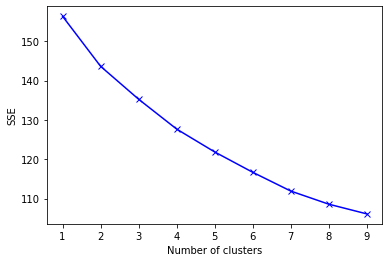

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = tfidf_matrix
SSE = [] 

K = range(1,10)
for k in K: 
    kmeans = KMeans(n_clusters = k, init='k-means++' )
    kmeans.fit(X) 
    SSE.append(kmeans.inertia_)

plt.plot(K, SSE, 'bx-') 
plt.xlabel('Number of clusters') 
plt.ylabel('SSE') 
plt.show() 


In [24]:
## Import Kmeans
from sklearn.cluster import KMeans

# Define number of clusters
num_clusters = 8

#Run clustering algorithm
km = KMeans(n_clusters=num_clusters, init = 'k-means++', n_init=100)
km.fit(tfidf_matrix)

KMeans(n_init=100)

In [25]:
# create the rank of documents 
ranks = []
for i in range(1, len(complaints)+1):
    ranks.append(i)

In [26]:
#final clusters
clusters = km.labels_.tolist()
complaints_data = { 'rank': ranks, 'complaints': complaints, 'cluster': clusters }
frame = pd.DataFrame(complaints_data, index = [clusters] , columns = ['rank', 'cluster'])

#number of docs per cluster
frame['cluster'].value_counts()

5    36
7    32
6    29
3    22
2    21
1    21
0    20
4    19
Name: cluster, dtype: int64

In [27]:
from sklearn.decomposition import PCA
# for reproducibility
random_state = 0 

# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(km.cluster_centers_)

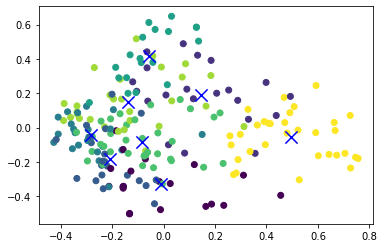

In [28]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(tfidf_matrix))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

## Document Similarity

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(complaints)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,ability,able,abort,abroad,abruptly,absolutely,absurd,abuse,abusive,academy,...,yell,yes,yesterday,yet,yhe,young,yr,yrs,zero,zip
0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.05,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.08,0.05,0.0,0.0,0.0,0.0,0.09,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.058904,0.215521,0.182969,0.115524,0.101660,0.252840,0.201003,0.053906,0.034021,...,0.289033,0.055400,0.140750,0.065878,0.269597,0.032154,0.117787,0.093806,0.075386,0.086815
1,0.058904,1.000000,0.029183,0.039495,0.070954,0.089734,0.045937,0.065438,0.065036,0.069791,...,0.149925,0.039287,0.036436,0.033462,0.066592,0.031696,0.029806,0.068744,0.067694,0.041796
2,0.215521,0.029183,1.000000,0.072735,0.000000,0.097376,0.063153,0.103386,0.017073,0.018096,...,0.170411,0.008478,0.137853,0.014302,0.109121,0.046971,0.065650,0.049193,0.044955,0.040058
3,0.182969,0.039495,0.072735,1.000000,0.046545,0.068685,0.167007,0.043522,0.024968,0.056919,...,0.144207,0.061890,0.061725,0.074481,0.042979,0.026907,0.086442,0.128524,0.023447,0.039246
4,0.115524,0.070954,0.000000,0.046545,1.000000,0.039369,0.000000,0.008040,0.062600,0.020940,...,0.043571,0.141875,0.000000,0.015111,0.064929,0.065745,0.048632,0.077277,0.037535,0.148112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.032154,0.031696,0.046971,0.026907,0.065745,0.061197,0.058961,0.017343,0.036205,0.017220,...,0.036267,0.014558,0.195264,0.000000,0.023312,1.000000,0.037038,0.075748,0.016844,0.110766
196,0.117787,0.029806,0.065650,0.086442,0.048632,0.099330,0.110859,0.071061,0.074851,0.012887,...,0.115512,0.056692,0.008513,0.000000,0.151707,0.037038,1.000000,0.096993,0.067839,0.102616
197,0.093806,0.068744,0.049193,0.128524,0.077277,0.090778,0.092418,0.038551,0.047668,0.183117,...,0.097875,0.112723,0.022593,0.102587,0.092445,0.075748,0.096993,1.000000,0.064660,0.046190
198,0.075386,0.067694,0.044955,0.023447,0.037535,0.079539,0.043127,0.098323,0.046328,0.003176,...,0.058667,0.001918,0.017526,0.045969,0.220150,0.016844,0.067839,0.064660,1.000000,0.067278


In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2','Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,12,49,0.812646,2
1,68,124,0.816258,2
2,9,38,0.886532,2
3,3,100,0.971403,2
4,52,139,1.00166,2
...,...,...,...,...
194,366,384,3.46721,36
195,389,393,3.77574,81
196,391,392,3.81475,83
197,394,396,4.0434,119


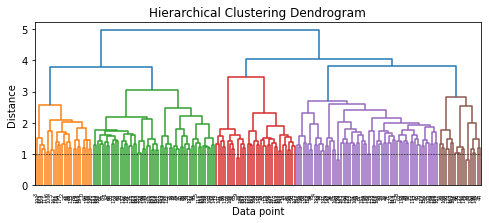

In [32]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [34]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0
cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([Data_sample, cluster_labels], axis=1)

,consumer_complaint_narrative,ClusterLabel
0,court law would like ask chase receipt physica...,21
1,research good option payoff high interest mort...,33
2,submit dispute trans union credit bureau regar...,12
3,send check citibank payment wife credit card m...,1
4,last friday schedule transfer yesterday money ...,124
...,...,...
195,take loan semesters student house college orig...,45
196,account first merit bank close account receive...,117
197,prepay visa card load fund account freeze foll...,68
198,huge complant company ... .they allow delarshi...,47


   ## Build a Movie Recommender System

In [35]:
import pandas as pd

# download dataset from https://www.kaggle.com/tmdb/tmdb-movie-metadata/home
df = pd.read_csv(r"C:\Users\OLUBISI\Desktop\archive\tmdb_5000_movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [36]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [10]:
#select the columns needed 
df = df[['title', 'tagline', 'overview', 'genres', 'popularity']]
df.tagline.fillna(" ", inplace=True)
                  
#create a new column for description
df['description'] = df['tagline'].map(str) + ' ' + df['overview']
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4800 non-null   object 
 1   tagline      4800 non-null   object 
 2   overview     4800 non-null   object 
 3   genres       4800 non-null   object 
 4   popularity   4800 non-null   float64
 5   description  4800 non-null   object 
dtypes: float64(1), object(5)
memory usage: 262.5+ KB


In [11]:
# Preprocess data
import nltk
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', " ", doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

4800

In [12]:
# Vectorize

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1, 2), min_df=2)
tfidf_matrix = tf.fit_transform(norm_corpus)
tfidf_matrix.shape

(4800, 20796)

In [13]:
# find the cosine similairty scores for documents instead of terms

from sklearn.metrics.pairwise import cosine_similarity
doc_sim = cosine_similarity(tfidf_matrix)
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799
0,1.000000,0.009070,0.000000,0.015911,0.024535,0.018863,0.000000,0.024484,0.000000,0.005971,...,0.008198,0.0,0.020806,0.029501,0.000000,0.000000,0.0,0.005942,0.000000,0.000000
1,0.009070,1.000000,0.011727,0.000000,0.040078,0.000000,0.012674,0.042249,0.032498,0.006880,...,0.009447,0.0,0.004771,0.000000,0.000000,0.012631,0.0,0.022335,0.012902,0.000000
2,0.000000,0.011727,1.000000,0.000000,0.000000,0.000000,0.000000,0.022559,0.014447,0.004508,...,0.040703,0.0,0.000000,0.000000,0.015676,0.000000,0.0,0.011741,0.000000,0.003888
3,0.015911,0.000000,0.000000,1.000000,0.008087,0.003294,0.013174,0.022198,0.023666,0.120670,...,0.000000,0.0,0.009305,0.000000,0.000000,0.000000,0.0,0.026817,0.032627,0.026083
4,0.024535,0.040078,0.000000,0.008087,1.000000,0.000000,0.008659,0.028700,0.000000,0.029824,...,0.013757,0.0,0.000000,0.000000,0.000000,0.010533,0.0,0.022298,0.000000,0.000000


In [14]:
#build a list of all movie titles
movies_list = df['title'].values
movies_list, movies_list.shape

(array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
        ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
        'My Date with Drew'], dtype=object),
 (4800,))

In [16]:
# Find movie ID
movie_idx = np.where(movies_list == 'Minions')[0][0]
movie_idx

546

In [17]:
# Get movie similiarities
movie_similarities = doc_sim_df.iloc[movie_idx].values
movie_similarities

array([0.00875589, 0.01008932, 0.        , ..., 0.00660971, 0.        ,
       0.        ])

In [19]:
# get top 5 similar movie IDs
similar_movie_idxs = np.argsort(-movie_similarities)[1:6]
similar_movie_idxs

array([ 506,  614,  813,  221, 3943], dtype=int64)

In [20]:
# get top 5 movies
similar_movies = movies_list[similar_movie_idxs]
similar_movies

array(['Despicable Me 2', 'Despicable Me', 'Superman', 'Stuart Little 2',
       'Freeway'], dtype=object)

In [21]:
# Get a list of popular movies
pop_movies = df.sort_values(by='popularity', ascending=False)
pop_movies.head()

,title,tagline,overview,genres,popularity,description
546,Minions,"Before Gru, they had a history of bad bosses","Minions Stuart, Kevin and Bob are recruited by...","[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",875.581305,"Before Gru, they had a history of bad bosses M..."
95,Interstellar,Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",724.247784,Mankind was born on Earth. It was never meant ...
788,Deadpool,Witness the beginning of a happy ending,Deadpool tells the origin story of former Spec...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",514.569956,Witness the beginning of a happy ending Deadpo...
94,Guardians of the Galaxy,All heroes start somewhere.,"Light years from Earth, 26 years after being a...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",481.098624,All heroes start somewhere. Light years from E...
127,Mad Max: Fury Road,What a Lovely Day.,An apocalyptic story set in the furthest reach...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",434.278564,What a Lovely Day. An apocalyptic story set in...


In [23]:
#Build a movie recommender

def movie_recommender(movie_title, movies=movies_list, doc_sims=doc_sim_df):
    # find movie id
    movie_idx = np.where(movies == movie_title)[0][0]
    # get movie similarities
    movie_similarities = doc_sims.iloc[movie_idx].values
    # get top 5 similar movie IDs
    similar_movie_idxs = np.argsort(-movie_similarities)[1:6]
    # get top 5 movies
    similar_movies = movies[similar_movie_idxs]
    # return the top 5 movies
    return similar_movies

In [24]:
# get a list of popular movies
pop_movies = df.sort_values(by='popularity', ascending=False)
pop_movies.head()

,title,tagline,overview,genres,popularity,description
546,Minions,"Before Gru, they had a history of bad bosses","Minions Stuart, Kevin and Bob are recruited by...","[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",875.581305,"Before Gru, they had a history of bad bosses M..."
95,Interstellar,Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",724.247784,Mankind was born on Earth. It was never meant ...
788,Deadpool,Witness the beginning of a happy ending,Deadpool tells the origin story of former Spec...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",514.569956,Witness the beginning of a happy ending Deadpo...
94,Guardians of the Galaxy,All heroes start somewhere.,"Light years from Earth, 26 years after being a...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",481.098624,All heroes start somewhere. Light years from E...
127,Mad Max: Fury Road,What a Lovely Day.,An apocalyptic story set in the furthest reach...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",434.278564,What a Lovely Day. An apocalyptic story set in...


In [26]:
popular_movies = ['Minions', 'Interstellar', 'Deadpool', 'Jurassic World',
'Pirates of the Caribbean: The Curse of the Black Pearl',
'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1']

In [30]:
# get top 5 movie for each of these movies

for movie in popular_movies:
    print('Movie:', movie)
    print('Top 5 recommended Movies:', movie_recommender(movie_title = movie))
    print()

Movie: Minions
Top 5 recommended Movies: ['Despicable Me 2' 'Despicable Me' 'Superman' 'Stuart Little 2' 'Freeway']

Movie: Interstellar
Top 5 recommended Movies: ['Gattaca' 'Space Cowboys' 'Space Pirate Captain Harlock'
 'Final Destination 2' 'Starship Troopers']

Movie: Deadpool
Top 5 recommended Movies: ['Silent Trigger' 'Underworld: Evolution' 'Mars Attacks!' 'Bronson'
 'Shaft']

Movie: Jurassic World
Top 5 recommended Movies: ['The Lost World: Jurassic Park' 'Jurassic Park'
 "National Lampoon's Vacation" 'The Nut Job' 'Vacation']

Movie: Pirates of the Caribbean: The Curse of the Black Pearl
Top 5 recommended Movies: ["Pirates of the Caribbean: Dead Man's Chest" 'The Pirate'
 'Pirates of the Caribbean: On Stranger Tides' 'The New World'
 'The Pirates! In an Adventure with Scientists!']

Movie: Dawn of the Planet of the Apes
Top 5 recommended Movies: ['Battle for the Planet of the Apes' 'Groove' 'Chicago Overcoat'
 'The Other End of the Line' 'Definitely, Maybe']

Movie: The Hunger